## Домашнее задание на графы
### Татьяна Шаврина

Формулировка:


Необходимо взять в качестве исходного материала небольшой корпус текстов. Можно использовать скачанные ранее газетные статьи или тексты из vk.com.
Задание состоит в том, чтобы очистить текст от служебных слов (вспомните про Mystem) и построить граф совместной встречаемости полнозначных слов в окне 3. То есть вершинами графа будут лексемы (не словоформы), а ребро между ними мы будем протягивать только в том случае, если эти слова встретились в тексте друг с другом рядом на расстоянии не более чем три слова. Граф рекомендуется строить с помощью библиотеки networkx.
После того как граф будет построен, его нужно визуализировать и посчитать те его характеристики (представленные тут), которые можно будет посчитать (несвязанный граф позволяет вычислить не все характеристики).

In [1]:
import networkx as nx
from pymystem3 import Mystem
import re
import matplotlib.pyplot as plt
#%matplotlib inline
from __future__ import unicode_literals
import matplotlib
matplotlib.rc('font', family='Verdana')

In [2]:
#загрузка корпуса - я взяла тексты "Басен Средневековой Армении" Орбели
corpus = open(r"/home/mi_air/Desktop/basni_clear.txt", "r", encoding = "utf8").read()


In [3]:
m = Mystem()
mystopwords = []
stop = open(r"/home/mi_air/stopwords_russian.txt", "r", encoding="utf8")
for line in stop:
    mystopwords.append(line.strip("\n"))
punct = "-—=+&^%$#@!()[]*.<?>,_«»1234567890 "
for i in punct:
    mystopwords.append(i)
mystopwords.append(" ")
mystopwords.append("\t")
mystopwords.append(".\t")
mystopwords.append("\n")
global mystopwords
global punct
print(mystopwords)

['а', 'е', 'и', 'ж', 'м', 'о', 'на', 'не', 'ни', 'об', 'но', 'он', 'мне', 'мои', 'мож', 'она', 'они', 'оно', 'мной', 'много', 'многочисленное', 'многочисленная', 'многочисленные', 'многочисленный', 'мною', 'мой', 'мог', 'могут', 'можно', 'может', 'можхо', 'мор', 'моя', 'моё', 'мочь', 'над', 'нее', 'оба', 'нам', 'нем', 'нами', 'ними', 'мимо', 'немного', 'одной', 'одного', 'менее', 'однажды', 'однако', 'меня', 'нему', 'меньше', 'ней', 'наверху', 'него', 'ниже', 'мало', 'надо', 'один', 'одиннадцать', 'одиннадцатый', 'назад', 'наиболее', 'недавно', 'миллионов', 'недалеко', 'между', 'низко', 'меля', 'нельзя', 'нибудь', 'непрерывно', 'наконец', 'никогда', 'никуда', 'нас', 'наш', 'нет', 'нею', 'неё', 'них', 'мира', 'наша', 'наше', 'наши', 'ничего', 'начала', 'нередко', 'несколько', 'обычно', 'опять', 'около', 'мы', 'ну', 'нх', 'от', 'отовсюду', 'особенно', 'нужно', 'очень', 'отсюда', 'в', 'во', 'вон', 'вниз', 'внизу', 'вокруг', 'вот', 'восемнадцать', 'восемнадцатый', 'восемь', 'восьмой', 'вве

In [4]:
#лемматизируем корпус
def lemmatize(text):
    lemmas = m.lemmatize(text)
    return(lemmas)

In [5]:
#удалим стоп-слова (после лемматизации, так как иной порядок может повредить лемматизации)
def stopwords(lst):
    stopwords=mystopwords
    try:
        return ([token for token in lst if not token in stopwords])
    except:
        return ""
            

In [6]:
#удалимтокены, состоящие только из склеившихся пунктуаторов
def del_punct(lst):
    p = punct
    lst2=[]
    
    for i in lst:
        d = False
        for j in p:
            if j not in i:
                d = True
            else:
                d = False
        if d==True:
            lst2.append(i)
    return(lst2)

In [7]:
cleared_words = del_punct(stopwords(lemmatize(corpus)))
len(cleared_words)


17657

In [8]:
#теперь пропишем расстояние 3 как критерий добавления в граф
W = nx.Graph()
lst = cleared_words

In [9]:
for i in range(len(lst)):
    if i < 3:
        W.add_nodes_from([lst[0],lst[1],lst[2]])
        W.add_edges_from([(lst[0],lst[1]),(lst[0],lst[2]),(lst[1],lst[2])])
                
    elif i> len(lst)-3:
        if lst[i] in W.nodes():
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
        else:
            W.add_node(lst[i])
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                    
        
    else:
        if lst[i] in W.nodes():
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                if lst[i+j] in W.nodes():
                    W.add_edge(lst[i],lst[i+j])
                else:
                    W.add_node(lst[i+j])
                    W.add_edge(lst[i],lst[i+j])
        else:
            W.add_node(lst[i])
            for j in range(1,2):
                if lst[i-j] in W.nodes():
                    W.add_edge(lst[i],lst[i-j])
                else:
                    W.add_node(lst[i-j])
                    W.add_edge(lst[i],lst[i-j])
                if lst[i+j] in W.nodes():
                    W.add_edge(lst[i],lst[i+j])
                else:
                    W.add_node(lst[i+j])
                    W.add_edge(lst[i],lst[i+j])

Узнаем самые центральные существительные в этом графе, его диаметр (можно узнать только если граф связанный), плотность, ассортативность, кластерный коэффициент. Нарисуем сам граф.

In [10]:
W.number_of_nodes()


5128

In [11]:
W.number_of_edges()

15358

In [12]:
nx.radius(W)

7

In [13]:
nx.diameter(W)

13

In [14]:
#кластерный коэффициент
nx.average_clustering(W)

0.06075303577340091

In [15]:
nx.transitivity(W)

0.02852187366807999

In [16]:
#плотность
nx.density(W)

0.0011682971707399601

In [17]:
#ассортативность
nx.degree_pearson_correlation_coefficient(W)

-0.037424448777229481

In [18]:
# 15 самых центральных узлов 
i = []
deg = nx.degree_centrality(W)

for nodeid in sorted(deg, key=deg.get, reverse=True):
    i.append(nodeid)
i[:15]


['говорить',
 'басня',
 'мхитар',
 'назидание',
 'вардан',
 'волк',
 'лиса',
 'царь',
 'ибо',
 'давать',
 'армянский',
 'становиться',
 'народ',
 'бог',
 'слово']

/home/mi_air/ioSavoy5/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


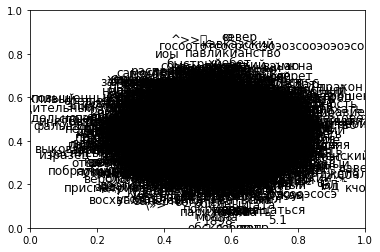

In [19]:
pos = nx.spring_layout(W)
nx.draw_networkx_labels(W,pos)
plt.show()

/home/mi_air/ioSavoy5/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/mi_air/ioSavoy5/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/mi_air/ioSavoy5/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/mi_air/ioSavoy5/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

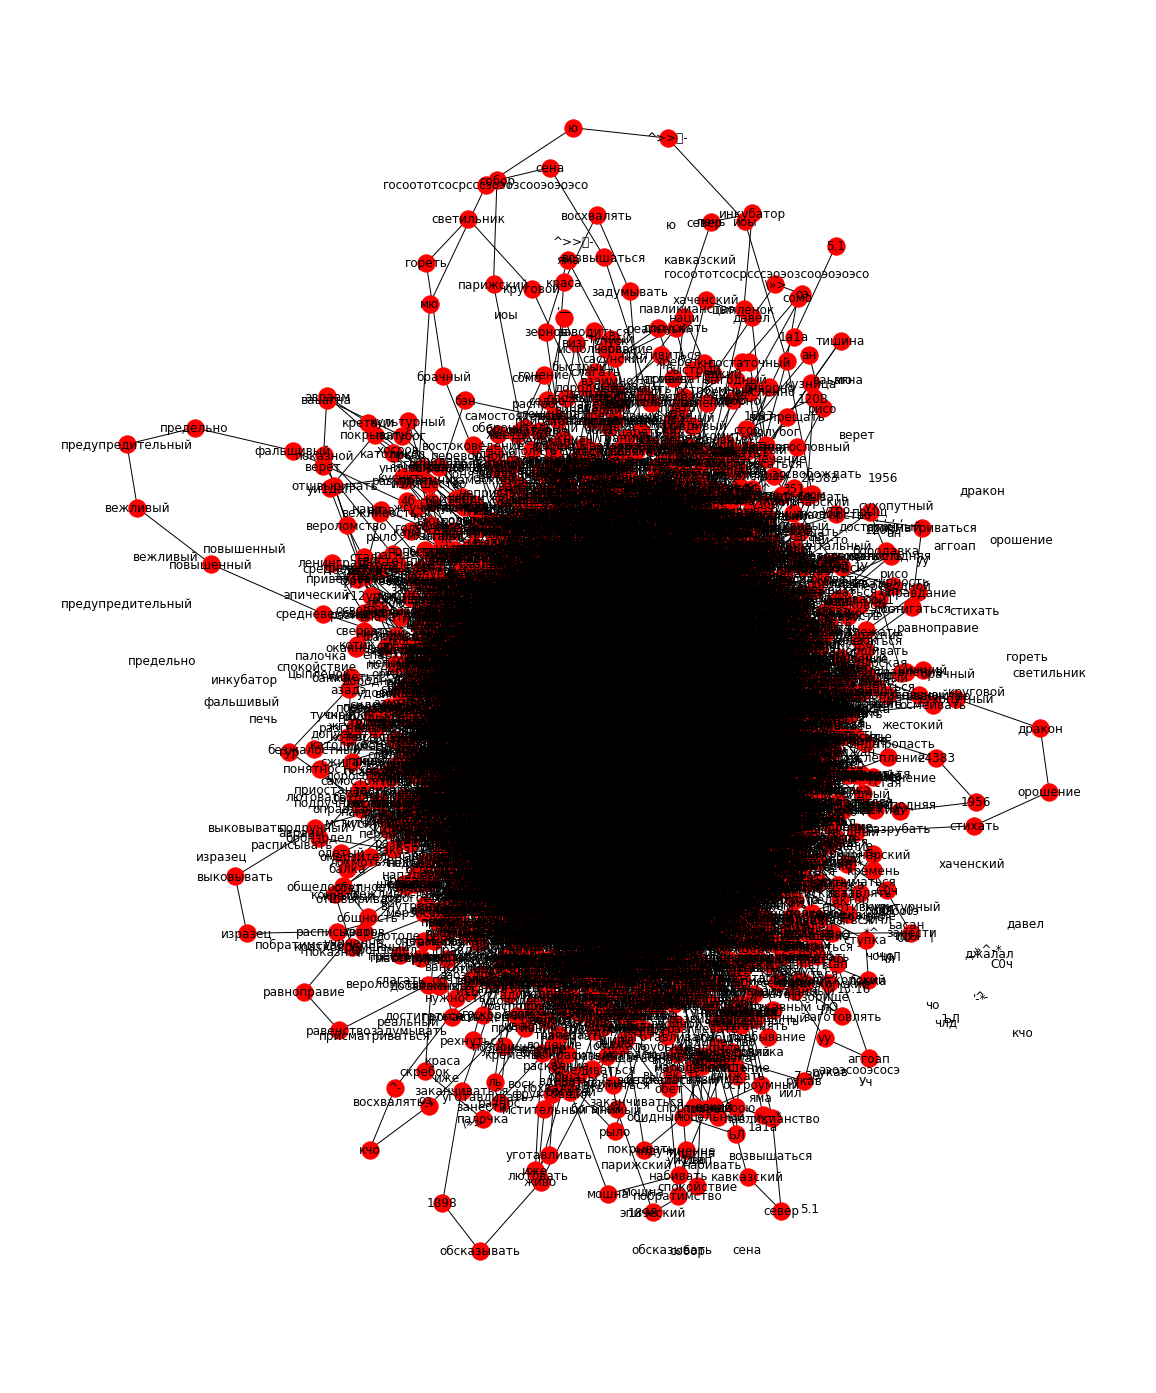

In [20]:
plt.figure(figsize=(20, 25))
nx.draw_networkx_labels(W,pos)
nx.draw(W, with_labels = True)
plt.show()

In [21]:
nx.write_gexf(W,'basni.gexf')